In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# Parte 1: Preparación del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# ⬇️ Carga del dataset directamente desde Google Drive
DATA_URL = "https://drive.google.com/uc?id=1YmQ0UqU5UTKB_qkegpWdzJsufrAp_J3u&export=download"

df = pd.read_csv(DATA_URL)
print("Shape:", df.shape)
df.head()

Shape: (21223, 16)


,timestamp,timestampConverted,timestampSelected,processId,parentProcessId,userId,processNameConverted,processName,hostName,eventId,eventName,argsNum,returnValue,args,sus,evil
0,9402.256254,6:09,1,7611,7337,0,1,ps,ip-10-100-1-4,257,openat,4,9,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
1,10321.603050,14:28,1,7852,7337,0,1,ps,ip-10-100-1-4,257,openat,4,9,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
2,14397.462520,11:06,1,159,1,0,2,systemd-journal,ip-10-100-1-4,5,fstat,2,0,"[{'name': 'fd', 'type': 'int', 'value': 33}, {...",0,0
3,4559.377290,9:03,1,7493,7337,0,1,ps,ip-10-100-1-4,3,close,1,0,"[{'name': 'fd', 'type': 'int', 'value': 9}]",0,0
4,13979.608990,14:36,1,1,0,0,3,systemd,ip-10-100-1-4,3,close,1,0,"[{'name': 'fd', 'type': 'int', 'value': 16}]",0,0


      timestamp  timestampConverted  timestampSelected  processId  \
0   9402.256254 1900-01-01 06:09:00                  1       7611   
1  10321.603050 1900-01-01 14:28:00                  1       7852   
2  14397.462520 1900-01-01 11:06:00                  1        159   
3   4559.377290 1900-01-01 09:03:00                  1       7493   
4  13979.608990 1900-01-01 14:36:00                  1          1   

   parentProcessId  userId  processNameConverted      processName  \
0             7337       0                     1               ps   
1             7337       0                     1               ps   
2                1       0                     2  systemd-journal   
3             7337       0                     1               ps   
4                0       0                     3          systemd   

        hostName  eventId eventName  argsNum  returnValue  \
0  ip-10-100-1-4      257    openat        4            9   
1  ip-10-100-1-4      257    openat        4    

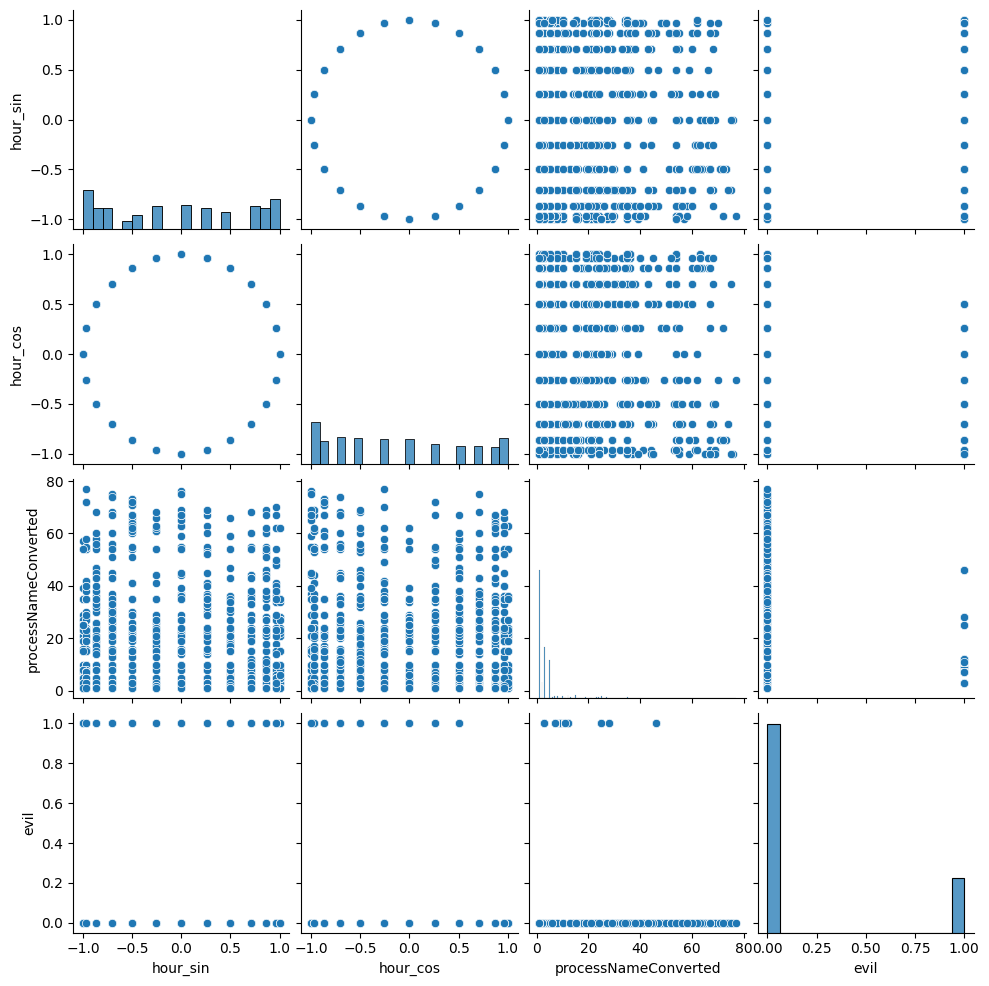

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

# Visualización de la distribución
df['timestampConverted'] = pd.to_datetime(df['timestampConverted'], format='%H:%M', errors='coerce')
df['hour'] = df['timestampConverted'].dt.hour
df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)
sns.pairplot(df[['hour_sin','hour_cos','processNameConverted','eventName','evil']])
plt.show()

In [ ]:
# Parte 3: Preprocesamiento
X = df[['hour_sin','hour_cos','processNameConverted','eventId','evil']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

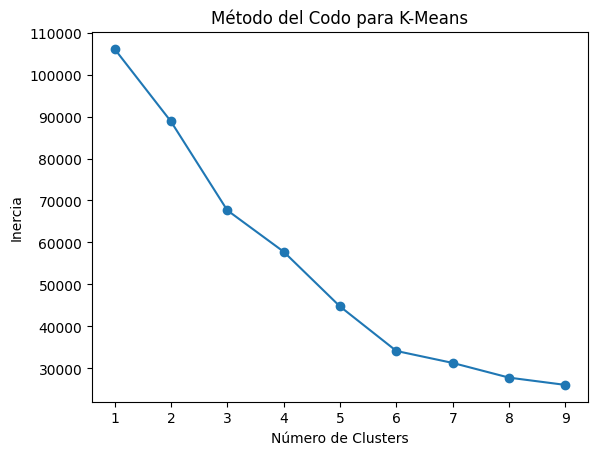

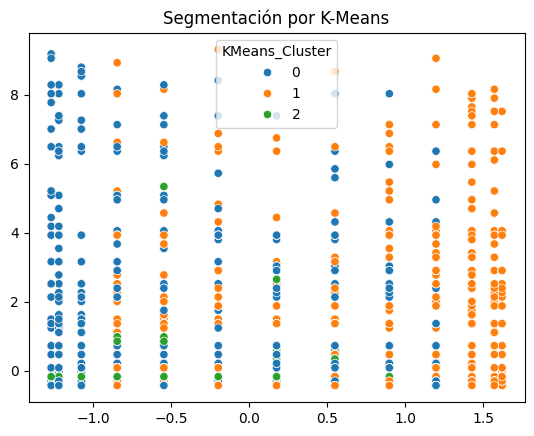

In [ ]:
# Parte 4.1: Clustering con K-Means
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Método del Codo
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters') # Numero de grupos
plt.ylabel('Inercia') # la suma de las distancias cuadradas de cada punto a su centroide (cuánto error hay dentro de cada cluster).
plt.title('Método del Codo para K-Means')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=df['KMeans_Cluster'], palette='tab10')
plt.title('Segmentación por K-Means')
plt.show()


In [ ]:
# Parte 4.1.1: Interpretación de Clustering con K-Means
df.groupby('KMeans_Cluster')[['hour_sin','hour_cos','processNameConverted','evil']].mean()


,hour_sin,hour_cos,processNameConverted,evil
KMeans_Cluster,,,,
0,0.492030,-0.398277,4.307551,0.0
1,-0.505213,0.401610,4.193711,0.0
2,-0.240505,-0.546325,4.667956,1.0


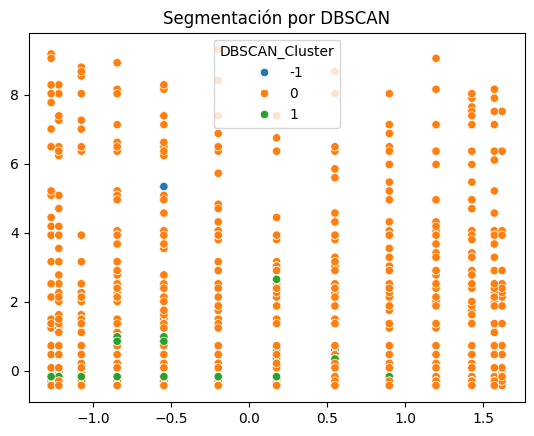

In [ ]:
# Parte 4.2: Clustering con DBSCAN
dbscan = DBSCAN(eps=2.2, min_samples=7) # eps = radio máximo para considerar que dos puntos están “cerca”./ min_samples =  número mínimo de puntos vecinos necesarios para formar un cluster.
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('Segmentación por DBSCAN')
plt.show()

In [ ]:
# Parte 4.2.1: Interpretando los Clustering con DBSCAN
df['DBSCAN_Cluster'].value_counts()
df.groupby('DBSCAN_Cluster')[['hour_sin','hour_cos','processNameConverted','eventId','evil']].mean()





,hour_sin,hour_cos,processNameConverted,eventId,evil
DBSCAN_Cluster,,,,,
-1,0.866025,-0.500000,46.000000,235.500000,1.0
0,0.009615,-0.011333,4.252481,335.869154,0.0
1,-0.242018,-0.546388,4.611440,145.410210,1.0


In [ ]:
# Parte 4.2.1: Interpretando los Clustering con DBSCAN sin atípicos
df_no_noise = df[df['DBSCAN_Cluster'] != -1]
df_no_noise.groupby('DBSCAN_Cluster')[['hour_sin','hour_cos','processNameConverted','eventId','evil']].mean()

,hour_sin,hour_cos,processNameConverted,eventId,evil
DBSCAN_Cluster,,,,,
0,0.009615,-0.011333,4.252481,335.869154,0.0
1,-0.242018,-0.546388,4.611440,145.410210,1.0


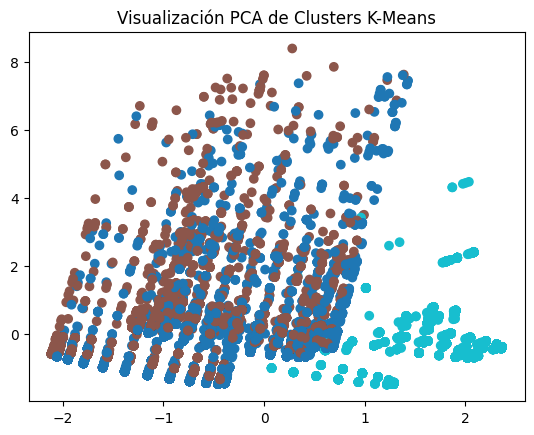

In [ ]:
# Parte 5.1: Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización PCA de Clusters K-Means')
plt.show()


In [ ]:
# Parte 5.1.1: Interpretación de Reducción de dimensionalidad con PCA
df.groupby('KMeans_Cluster')[['hour_sin','hour_cos','processNameConverted','eventId','evil']].mean()


,hour_sin,hour_cos,processNameConverted,eventId,evil
KMeans_Cluster,,,,,
0,0.492030,-0.398277,4.307551,332.740447,0.0
1,-0.505213,0.401610,4.193711,339.208083,0.0
2,-0.240505,-0.546325,4.667956,145.533227,1.0


In [ ]:
# Parte 5.1.2: Interpretación detallada de Reducción de dimensionalidad con PCA
# Mostrar algunos clientes por cluster
for i in range(4):
    print(f"\nCluster {i}")
    display(df[df['KMeans_Cluster'] == i][['hour_sin','hour_cos','processNameConverted','eventId','evil']].head())



Cluster 0


,hour_sin,hour_cos,processNameConverted,eventId,evil
0,1.000000,6.123234e-17,1,257,0
1,-0.500000,-8.660254e-01,1,257,0
2,0.258819,-9.659258e-01,2,5,0
3,0.707107,-7.071068e-01,1,3,0
4,-0.500000,-8.660254e-01,3,3,0



Cluster 1


,hour_sin,hour_cos,processNameConverted,eventId,evil
9,-0.707107,-0.707107,1,4,0
10,-0.866025,-0.500000,5,5,0
12,0.000000,1.000000,3,1005,0
17,0.500000,0.866025,1,1005,0
22,-0.500000,0.866025,1,257,0



Cluster 2


,hour_sin,hour_cos,processNameConverted,eventId,evil
5,0.258819,-9.659258e-01,3,257,1
11,-1.000000,-1.836970e-16,3,4,1
13,-0.500000,-8.660254e-01,3,4,1
14,-1.000000,-1.836970e-16,3,3,1
18,1.000000,6.123234e-17,3,1005,1



Cluster 3


,hour_sin,hour_cos,processNameConverted,eventId,evil


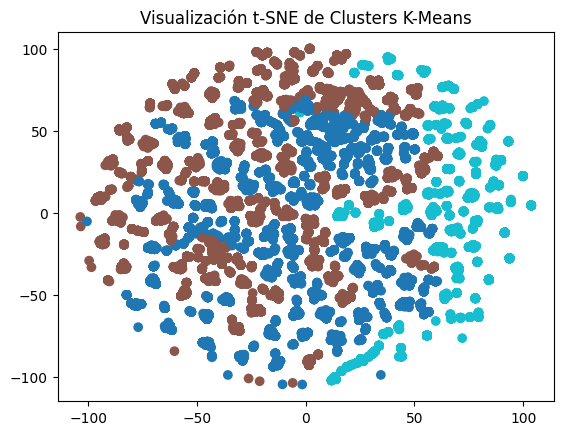

In [ ]:
# Parte 5.2: Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42) # cuántos vecinos cercanos considera t-SNE / cuánto se mueven los puntos
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters K-Means')
plt.show()


In [ ]:
# Parte 5.2.1: Interpretación de Reducción de dimensionalidad con t-SNE
df.groupby('KMeans_Cluster')[['hour_sin','hour_cos','timestampSelected','processNameConverted','sus','evil']].mean()


,hour_sin,hour_cos,timestampSelected,processNameConverted,sus,evil
KMeans_Cluster,,,,,,
0,0.492030,-0.398277,0.757251,4.307551,0.258633,0.0
1,-0.505213,0.401610,0.321828,4.193711,0.227122,0.0
2,-0.240505,-0.546325,0.943104,4.667956,1.000000,1.0


In [ ]:
# Parte 6: Análisis
print("Clusters únicos KMeans:", df['KMeans_Cluster'].unique())
print("Clusters únicos DBSCAN:", df['DBSCAN_Cluster'].unique())


Clusters únicos KMeans: [0 2 1]
Clusters únicos DBSCAN: [ 0  1 -1]
